# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flying A380 business class ...
1,✅ Trip Verified | British Airways absolutely ...
2,✅ Trip Verified | My recent experience with B...
3,✅ Trip Verified | This is to express our disp...
4,✅ Trip Verified | I flew London to Malaga on ...


In [4]:
df.to_csv("C:/Users/Acer/Desktop/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [6]:
df.reviews.unique

<bound method Series.unique of 0      ✅ Trip Verified |  Flying A380 business class ...
1      ✅ Trip Verified |  British Airways absolutely ...
2      ✅ Trip Verified |  My recent experience with B...
3      ✅ Trip Verified |  This is to express our disp...
4      ✅ Trip Verified |  I flew London to Malaga on ...
                             ...                        
995    ✅ Trip Verified |  Heathrow to Athens on A321....
996    ✅ Trip Verified | London to Bangkok. I am not ...
997    ✅ Trip Verified |  Abu Dhabi to London. Althou...
998    ✅ Trip Verified |  Gatwick to Orlando. Stains ...
999    ✅ Trip Verified | Newcastle to Las Vegas via L...
Name: reviews, Length: 1000, dtype: object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [37]:
df.describe()

,reviews
count,789
unique,789
top,✅ Trip Verified | When on our way to Heathrow ...
freq,1


In [47]:
df.reviews

9      ✅ Trip Verified | When on our way to Heathrow ...
10     ✅ Trip Verified | Nice flight, good crew, very...
11     ✅ Trip Verified |  8 months have passed and st...
12     ✅ Trip Verified |  In June my flight was cance...
13     ✅ Trip Verified |  Ground and cabin crew alway...
                             ...                        
995    ✅ Trip Verified |  Heathrow to Athens on A321....
996    ✅ Trip Verified | London to Bangkok. I am not ...
997    ✅ Trip Verified |  Abu Dhabi to London. Althou...
998    ✅ Trip Verified |  Gatwick to Orlando. Stains ...
999    ✅ Trip Verified | Newcastle to Las Vegas via L...
Name: reviews, Length: 789, dtype: object

In [44]:
df=df[df.reviews.str.contains('Trip Verified',case=True)]
df.head()

,reviews
9,✅ Trip Verified | When on our way to Heathrow ...
10,"✅ Trip Verified | Nice flight, good crew, very..."
11,✅ Trip Verified | 8 months have passed and st...
12,✅ Trip Verified | In June my flight was cance...
13,✅ Trip Verified | Ground and cabin crew alway...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 789 entries, 9 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  789 non-null    object
dtypes: object(1)
memory usage: 12.3+ KB


In [48]:
df.describe()

,reviews
count,789
unique,789
top,✅ Trip Verified | When on our way to Heathrow ...
freq,1


In [51]:
df.duplicated()

9      False
10     False
11     False
12     False
13     False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 789, dtype: bool

In [52]:
df.to_csv("C:/Users/Acer/Desktop/data/reviews.csv",index=False)

In [54]:
df=pd.read_csv("C:/Users/Acer/Desktop/data/reviews.csv")
df.head()

,reviews
0,✅ Trip Verified | When on our way to Heathrow ...
1,"✅ Trip Verified | Nice flight, good crew, very..."
2,✅ Trip Verified | 8 months have passed and st...
3,✅ Trip Verified | In June my flight was cance...
4,✅ Trip Verified | Ground and cabin crew alway...


In [56]:
df.describe()

,reviews
count,789
unique,789
top,✅ Trip Verified | When on our way to Heathrow ...
freq,1


In [55]:

l=df.reviews[1].split('|')
l[1]

" Nice flight, good crew, very good seat, food was what you would expect. The aircraft had the new style Business Class seats/suite the actual plane as not new in any since of the word. There were parts of the seat that were broken or missing however the seat still sat well and worked. Seat was also long enough to really lay out and get some sleep. The video system worked great and had plenty of content. The headphones however were cheap and didn't feel or work particular good. The layout on this 773 had a lot of business class seats, a lot! We sat in the forward cabin (enter aircraft turn left) and that cabin is the quieter part of the aircraft. The crew was very nice and were there the entire time for any needs or wants we might have had. One draw back to the seats is as we were traveling as a couple the middle divider didn't open enough to really feel like you and your mate are traveling together. LHR is what it is, crowded and expansive but we had a good lounge visit and were compl

In [57]:
for i in range(789):
    l=df.reviews[i].split('|')
    df.reviews[i]=l[1]
    
df.head()

,reviews
0,When on our way to Heathrow Airport and merel...
1,"Nice flight, good crew, very good seat, food ..."
2,8 months have passed and still wasting my ti...
3,In June my flight was cancelled within three...
4,Ground and cabin crew always provide good cu...


In [78]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [92]:
from textblob import TextBlob
for i in range(789):
    rev=df.reviews[i]
    analysis=TextBlob(rev)
    scr=analysis.sentiment.polarity
    if scr > 0:
        df['label'][i] = 1
    elif scr < 0:
        df['label'][i] = -1
    else:
        df['label'][i] = 0
    

C:\Users\Acer\AppData\Local\Temp\ipykernel_11332\2068664626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = -1
C:\Users\Acer\AppData\Local\Temp\ipykernel_11332\2068664626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 1
C:\Users\Acer\AppData\Local\Temp\ipykernel_11332\2068664626.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = 0


In [93]:
df.head()

,reviews,label
0,When on our way to Heathrow Airport and merel...,-1.0
1,"Nice flight, good crew, very good seat, food ...",1.0
2,8 months have passed and still wasting my ti...,-1.0
3,In June my flight was cancelled within three...,0.0
4,Ground and cabin crew always provide good cu...,1.0


In [115]:
data=df.groupby(df.label).count()
data.reviews

label
-1.0    270
 0.0      9
 1.0    510
Name: reviews, dtype: int64

In [101]:
df.to_csv("C:/Users/Acer/Desktop/data/final_reviews.csv",index=False)

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


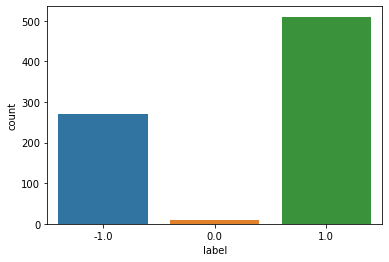

In [132]:
sns.countplot(df.label)
plt.savefig('C:/Users/Acer/Desktop/data/count_plot.png',pad_inches=4)

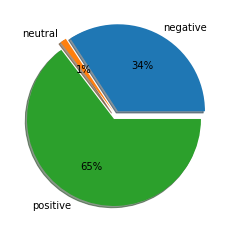

In [133]:
plt.pie(data.reviews,labels=['negative','neutral','positive'],explode=[0.05,0.05,0.05],autopct='%.0f%%',shadow=True)
plt.savefig('C:/Users/Acer/Desktop/data/pie_chart.png',pad_inches=4)
